In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns',None)

In [2]:
df1=pd.read_excel('NID CT data.xlsx',sheet_name='Sheet2')
df1.head()

,ProjectName,Region,Metro,ProjectStatus,SiteType,DeploymentType,NetworkClassification,Priority,NIDPM,TFSID,CISID,BOMID,CommittedNetworkLiveDate,PlannedNetworkLiveDate,ProjectCode,FulfillmentId,CBEDate,CBEUrl,IsHLDProject,IsMainstream,IsCriticalPathProject,PrimaryTrackedSystem,LastUpdatedBy,LastUpdatedDate,PowerPhaseMW,DPM,CisProjectNameDNU,TFSTeamDNU,TFSSubstate,IsDeleted,FacilityCode,FacilityID,Colo,ProjectFolder,EPPMProjectCode,OverrideForecastedNWLive,IsMigrated,NeedByDate,ExpectedResumeDate,EffectiveDockDate,SKUName,NumberOfRacks,SignedOff,ClassType,NetworkLive,kickoff,CT
0,APAC | HK1 | DataCenter | Replace,APAC,NaN,Complete,DC,Replace,NaN,10.0,NaN,NaN,NaN,10000059,NaT,2018-08-06,3895252F-4B88-4293-A897-23099D179E14,NaN,NaN,NaN,NaN,0.0,NaN,Sitepro,system,2021-01-27 10:00:45.083,NaN,Nikhil Agasty (Tata Consultancy Services Ltd),NaN,NaN,NaN,NaN,HK1,297.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,Signed-Off,Class C,NaT,NaT,NaN
1,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,Complete,NaN,BuildPlan,NaN,2.0,NaN,20181100140,2518518370967779062_f0c54bf3-ad22-4dcb-8905-fd...,NaN,NaT,NaT,5868D114-D088-4F2B-8754-9BDB67ED1401,NaN,NaN,NaN,NaN,1.0,NaN,CIS,system,2020-12-02 05:31:26.936,NaN,NaN,NaN,NaN,NaN,1.0,BER20,2403.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Class C,2019-09-23 16:39:44.644,NaT,NaN
2,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,Complete,NaN,BuildPlan,NaN,2.0,NaN,20181100141,2518518370939217742_416297e4-4a9f-418f-b033-d8...,NaN,NaT,NaT,57DA29EE-C3A3-4B53-8399-2FEB642D41E7,NaN,NaN,NaN,NaN,1.0,NaN,CIS,system,2020-12-02 05:31:26.936,NaN,NaN,NaN,NaN,NaN,1.0,BER20,2403.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Class C,2019-09-23 16:40:44.874,NaT,NaN
3,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,Complete,NaN,BuildPlan,NaN,2.0,NaN,20181100142,2518518370916356040_004ffb2f-499f-4b6e-8533-84...,NaN,NaT,NaT,EA225467-0926-46F4-960A-D29F13159A17,NaN,NaN,NaN,NaN,1.0,NaN,CIS,system,2020-12-02 05:31:26.936,NaN,NaN,NaN,NaN,NaN,1.0,BER20,2403.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Class C,2019-05-31 12:49:50.631,NaT,NaN
4,BL7_CLE30_UAL_MSFT_Augment,AMEREAST,NaN,Complete,NaN,UAL,NaN,0.0,NaN,20181100929,2518443429863713620_9feee323-ac94-4701-9661-12...,NaN,NaT,NaT,E70364CF-B5DC-46A5-AFA3-F34E79B14C6D,NaN,NaN,NaN,NaN,1.0,NaN,CIS,system,2020-12-02 05:31:26.936,NaN,NaN,NaN,NaN,NaN,1.0,BL7,2097.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Class C,2019-05-24 23:53:17.033,NaT,NaN


In [3]:
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
   
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Feature Name'] = summary['index']
    summary = summary[['Feature Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['% Missing Values'] = np.round((df.isnull().sum().values/5030)*100,2)
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [4]:
summary_table(df1)

Dataset Shape: (5030, 47)


,Feature Name,dtypes,Missing Values,% Missing Values,Uniques Values
0,ProjectName,object,0,0.00,3676
1,Region,object,38,0.76,15
2,Metro,object,1663,33.06,405
3,ProjectStatus,object,0,0.00,1
4,SiteType,object,1553,30.87,10
5,DeploymentType,object,847,16.84,24
6,NetworkClassification,object,3345,66.50,6
7,Priority,float64,223,4.43,16
8,NIDPM,object,1794,35.67,71
9,TFSID,object,291,5.79,4577


In [5]:
#Selecting useful columns for further analysis
col=['ProjectName','Region', 'Metro', 'SiteType','DeploymentType', 'NIDPM','IsMainstream', 'FacilityCode','CT']

df2=df1[col]

In [6]:
df2.head()

,ProjectName,Region,Metro,SiteType,DeploymentType,NIDPM,IsMainstream,FacilityCode,CT
0,APAC | HK1 | DataCenter | Replace,APAC,NaN,DC,Replace,NaN,0.0,HK1,NaN
1,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,NaN,BuildPlan,NaN,1.0,BER20,NaN
2,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,NaN,BuildPlan,NaN,1.0,BER20,NaN
3,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,NaN,BuildPlan,NaN,1.0,BER20,NaN
4,BL7_CLE30_UAL_MSFT_Augment,AMEREAST,NaN,NaN,UAL,NaN,1.0,BL7,NaN


In [7]:
summary_table(df2)

Dataset Shape: (5030, 9)


,Feature Name,dtypes,Missing Values,% Missing Values,Uniques Values
0,ProjectName,object,0,0.00,3676
1,Region,object,38,0.76,15
2,Metro,object,1663,33.06,405
3,SiteType,object,1553,30.87,10
4,DeploymentType,object,847,16.84,24
5,NIDPM,object,1794,35.67,71
6,IsMainstream,float64,1184,23.54,2
7,FacilityCode,object,6,0.12,921
8,CT,float64,3216,63.94,565


In [8]:
df2['IsMainstream']= df2['IsMainstream'].astype('object')

In [9]:
df3=df2[df2['CT']>=2]
df3.shape

(1788, 9)

In [10]:
df3.describe()

,CT
count,1788.000000
mean,353.481544
std,235.800541
min,3.000000
25%,181.000000
50%,332.000000
75%,450.000000
max,1219.000000


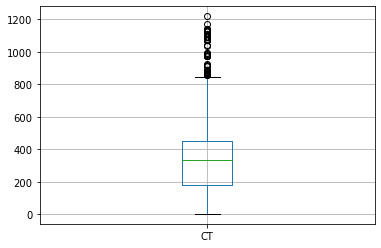

In [11]:
df3.boxplot(column="CT") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

<AxesSubplot:xlabel='CT', ylabel='Density'>

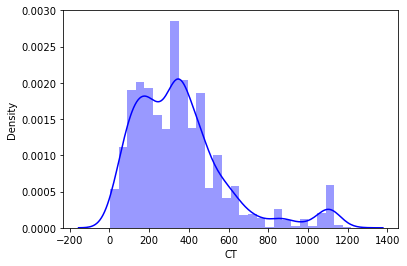

In [12]:
sns.distplot(df3["CT"], color="blue",kde=True) #Lets see the distribusion curve

In [13]:
df3.shape

(1788, 9)

In [14]:
df3.isnull().sum()

ProjectName         0
Region              0
Metro               9
SiteType            0
DeploymentType      4
NIDPM               2
IsMainstream      111
FacilityCode        0
CT                  0
dtype: int64

In [15]:
df3['Metro']=df3['Metro'].fillna(df3['Metro'].mode()[0])
df3['DeploymentType']=df3['DeploymentType'].fillna(df3['DeploymentType'].mode()[0])
df3['IsMainstream']=df3['IsMainstream'].fillna("Unknown")
df3['NIDPM']=df3['NIDPM'].fillna("Unknown")

In [16]:
df3.isnull().sum()

ProjectName       0
Region            0
Metro             0
SiteType          0
DeploymentType    0
NIDPM             0
IsMainstream      0
FacilityCode      0
CT                0
dtype: int64

In [23]:
value={0:'False',1:'True'}

In [17]:
df3['IsMainstream'].replace(value,inplace=True)

In [18]:
df3.sample(5)

,ProjectName,Region,Metro,SiteType,DeploymentType,NIDPM,IsMainstream,FacilityCode,CT
2079,BL | BL7 | RNG2 | OneWAN Build,AMEREAST,Blue Ridge,RNG,Aug,Kathy Brown,False,BL7,215.0
1129,"CBR | CBR23 | DC | Canberra, Australia - New 2...",APAC,Canberra,DC,New Build,Vinay Vijayendra Murthy,True,CBR23,269.0
1617,ATL | ATL31 | GW | Public,AMEREAST,Atlanta,GW,New Build,Brian Long,False,ATL31,637.0
3125,CHI | CH1| GOV | OneWAN,AMEREAST,Chicago,DC,Aug,Darren (Norm) Norman,False,CH1,419.0
2708,ATL | MSL02 | ILA | New - Day 1 deployment,AMEREAST,Atlanta,CLS/ILA,Upgrade,Brian Long,False,MSL02,374.0


In [19]:
condition1= [
    (df3['CT']<=220),
    (df3['CT']>220)
    
]

In [39]:
con_value=['With-in SLA','Out-of SLA']

In [21]:
df3['CT_Status']=np.select(condition1,con_value)

In [22]:
df3.sample(10)

,ProjectName,Region,Metro,SiteType,DeploymentType,NIDPM,IsMainstream,FacilityCode,CT,CT_Status
2343,EWR | EWR30 | GW | Subsea | Public,AMEREAST,New York,GW,Subsea,Sundar Ganesh Natarajan,False,EWR30,250.0,Out-of SLA
3628,BJ1 T2 network refresh,APAC,Beijing,DC,Upgrade,Manikandan Ramachandran,False,BJ1,152.0,With-in SLA
3024,AMS | AMS06 | RNG | Phase 2,EMEA,Agriport,RNG,New Build,Petko Bozhilov,False,AMS06,492.0,Out-of SLA
4593,MIA | MIA | Edge | Edge refresh,AMEREAST,Miami,Edge,New Build,Brian Long,False,MIA,161.0,With-in SLA
3143,DUB | DB3 | DC | MACSEC Upgrade,EMEA,Dublin,DC,Aug,Sundar Ganesh Natarajan,False,DB3,73.0,With-in SLA
2510,Osaka | OSA20 | SWAN Deployment,APAC,Osaka,RNG,Upgrade,Vinay Vijayendra Murthy,False,OSA20,50.0,With-in SLA
2161,MMA01 | KEL70 | ILA | SLS-331,EMEA,Stockholm,CLS/ILA,SubSea,Sundar Ganesh Natarajan,False,KEL70,633.0,Out-of SLA
3082,Seoul |SLA| Edge| MX10003 Express Route deploy...,APAC,Seoul,Edge,ER,Vinay Vijayendra Murthy,False,SLA,458.0,Out-of SLA
3018,LMT | LMT70 | ILA | SLS-203 OLS | Public,AMERWEST,Klamath Falls,CLS/ILA,New Build,Jason Schultheis,False,LMT70,567.0,Out-of SLA
2704,ATL | MQY01 | ILA | New - Day 1 deployment,AMEREAST,Atlanta,CLS/ILA,Upgrade,Brian Long,False,MQY01,374.0,Out-of SLA


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 9 to 4983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProjectName     1788 non-null   object 
 1   Region          1788 non-null   object 
 2   Metro           1788 non-null   object 
 3   SiteType        1788 non-null   object 
 4   DeploymentType  1788 non-null   object 
 5   NIDPM           1788 non-null   object 
 6   IsMainstream    1788 non-null   object 
 7   FacilityCode    1788 non-null   object 
 8   CT              1788 non-null   float64
 9   CT_Status       1788 non-null   object 
dtypes: float64(1), object(9)
memory usage: 153.7+ KB


In [24]:
condition2= [
    (df3['CT']<=220),
    (df3['CT']>220) & (df3['CT']<=440),
    (df3['CT']>440) & (df3['CT']<=1000),
    (df3['CT']>1000)
    ]

In [38]:
con2_value=['Green','Yellow','Orange','Red']
con3_value=['Green','Yellow','Red']

In [26]:
df3['CT_Indicator']=np.select(condition2,con2_value)

In [27]:
df3.sample(10)

,ProjectName,Region,Metro,SiteType,DeploymentType,NIDPM,IsMainstream,FacilityCode,CT,CT_Status,CT_Indicator
2995,DEN | DEN06 | ILA | SLS-205 OLS | Public,AMERWEST,Denver,CLS/ILA,New Build,Jamie Holloway,False,DEN06,455.0,Out-of SLA,Orange
1617,ATL | ATL31 | GW | Public,AMEREAST,Atlanta,GW,New Build,Brian Long,False,ATL31,637.0,Out-of SLA,Orange
3167,JNB20 - Juniper MX240 Route Reflector Deployment,EMEA,Johanessburg,RNG,RR,Sundar Ganesh Natarajan,False,JNB20,542.0,Out-of SLA,Orange
3777,SEA | SEA | Edge | MX10003 Express Route deplo...,AMERWEST,Seattle,Edge,ER,Kathy Brown,False,SEA,120.0,With-in SLA,Green
1590,DUB21| DC | New Site,EMEA,Dublin,DC,New Build,Petko Bozhilov,False,DUB21,733.0,Out-of SLA,Orange
3819,AMS | AMS30 | RNG | RH Line-card augment,EMEA,Schiphol,RNG,Aug,Petko Bozhilov,False,AMS30,109.0,With-in SLA,Green
3263,Not Applicable | ABI71 | ILA | New - Day 1 dep...,AMERWEST,Abilene,CLS/ILA,Upgrade,Darren (Norm) Norman,False,ABI71,348.0,Out-of SLA,Yellow
1804,AM | AM2 | DC | DC Upgrade,EMEA,Schiphol,DC,Upgrade,Petko Bozhilov,False,AM2,639.0,Out-of SLA,Orange
1659,SYD - Express Route Deployment,APAC,Sydney,Edge,ER,Closed,False,SYD,176.0,With-in SLA,Green
2173,CBR | CBR22 | MGFX Colo Expansion | F01C02,APAC,Canberra,DC,Expansion,Vinay Vijayendra Murthy,False,CBR22,440.0,Out-of SLA,Yellow


In [28]:
#df3.to_csv('NID_CleanData_new.csv',index=0,columns=df3.columns)

## Revised Data Import And Prepration

In [50]:
data=pd.read_excel('NID CT data_revised.xlsx',sheet_name='Sheet2')

In [51]:
data.columns

Index(['ProjectName', 'Region', 'Metro', 'ProjectStatus', 'SiteType',
       'DeploymentType', 'NetworkClassification', 'Priority', 'NIDPM', 'TFSID',
       'CISID', 'BOMID', 'CommittedNetworkLiveDate', 'PlannedNetworkLiveDate',
       'ProjectCode', 'FulfillmentId', 'CBEDate', 'CBEUrl', 'IsHLDProject',
       'IsMainstream', 'IsCriticalPathProject', 'PrimaryTrackedSystem',
       'LastUpdatedBy', 'LastUpdatedDate', 'PowerPhaseMW', 'DPM',
       'FacilityCode', 'FacilityID', 'Colo', 'ProjectFolder',
       'EPPMProjectCode', 'OverrideForecastedNWLive', 'IsMigrated',
       'NeedByDate', 'ExpectedResumeDate', 'EffectiveDockDate', 'SKUName',
       'NumberOfRacks', 'SignedOff', 'ClassType', 'NetworkLive', 'kickoff',
       'CT'],
      dtype='object')

In [52]:
col1=['Region', 'Metro', 'SiteType','DeploymentType', 'NIDPM','DPM','IsMainstream', 'FacilityCode','ClassType','CT']
data2=data[col1]

In [53]:
#Fuction to see the summary of the data
def summary_table1(df):
    print(f"Dataset Shape: {df.shape}")
   
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Feature Name'] = summary['index']
    summary = summary[['Feature Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['% Missing Values'] = np.round((df.isnull().sum().values/2211)*100,2)
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [54]:
data2.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT
0,APAC,NaN,DC,Replace,NaN,Nikhil Agasty (Tata Consultancy Services Ltd),0.0,HK1,Class C,NaN
1,AMERWEST,Phoenix,DC,Expansion,Lisa Kelley,Madhvi Chand (Tata Consultancy Services),0.0,PHX10,Class A,NaN
2,AMERWEST,Hayward,CLS/ILA,Upgrade,Darren (Norm) Norman,Shweta Gadre (Tata Consultancy Services),0.0,HWD70,NaN,NaN
3,APAC,Taipei City,Edge,AFD,David Faith,Saroj Gohil (Tata Consultancy Services Ltd),1.0,TPE31,Class E,NaN
4,AMEREAST,Boydton,RNG,Upgrade,Steve Hegg,Shweta Gadre (Tata Consultancy Services),0.0,BN6,Class A,NaN


In [55]:
summary_table1(data2)

Dataset Shape: (2211, 10)


,Feature Name,dtypes,Missing Values,% Missing Values,Uniques Values
0,Region,object,0,0.00,5
1,Metro,object,31,1.40,282
2,SiteType,object,0,0.00,8
3,DeploymentType,object,86,3.89,21
4,NIDPM,object,126,5.70,56
5,DPM,object,206,9.32,64
6,IsMainstream,float64,177,8.01,2
7,FacilityCode,object,2,0.09,827
8,ClassType,object,151,6.83,8
9,CT,float64,593,26.82,544


In [56]:
data2['IsMainstream']=data2['IsMainstream'].astype('object')

In [57]:
data2.describe()

,CT
count,1618.000000
mean,358.324475
std,244.272644
min,0.000000
25%,183.000000
50%,332.000000
75%,460.000000
max,1219.000000


In [58]:
data2.isnull().sum()

Region              0
Metro              31
SiteType            0
DeploymentType     86
NIDPM             126
DPM               206
IsMainstream      177
FacilityCode        2
ClassType         151
CT                593
dtype: int64

In [59]:
data2['Metro']=data2['Metro'].fillna(data2['Metro'].mode()[0])
data2['DeploymentType']=data2['DeploymentType'].fillna(data2['DeploymentType'].mode()[0])
data2['IsMainstream']=data2['IsMainstream'].fillna(data2['IsMainstream'].mode()[0])
data2['NIDPM']=data2['NIDPM'].fillna("Missing")
data2['DPM']=data2['DPM'].fillna("Missing")
data2['FacilityCode']=data2['FacilityCode'].fillna(data2['FacilityCode'].mode()[0])
data2['ClassType']=data2['ClassType'].fillna('Missing')

In [60]:
data2.isnull().sum()

Region              0
Metro               0
SiteType            0
DeploymentType      0
NIDPM               0
DPM                 0
IsMainstream        0
FacilityCode        0
ClassType           0
CT                593
dtype: int64

In [61]:
data2.dropna(inplace=True)

In [62]:
data2.isnull().sum()

Region            0
Metro             0
SiteType          0
DeploymentType    0
NIDPM             0
DPM               0
IsMainstream      0
FacilityCode      0
ClassType         0
CT                0
dtype: int64

In [63]:
data2.shape

(1618, 10)

In [64]:
data2[data2['CT']<=1]

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT
332,AMERWEST,Los Angeles,GW,Aug,Unassigned,Unassigned,0.0,LAX31,Class F,0.0
494,AMERWEST,San Antonio,CLS/ILA,Expansion,Sue Santos,Unassigned,0.0,SN6,Class B,0.0
536,APAC,Tokyo,GW,Upgrade,Sue Santos,Unassigned,0.0,TYO79,Unknown,0.0
537,APAC,Tokyo,GW,Upgrade,Sue Santos,Unassigned,0.0,TYO79,Unknown,0.0
629,AMERWEST,Santa Clara,Edge,New Build,Uma Arumugam,Unassigned,0.0,Unknown,Missing,0.0
729,APAC,Melbourne,DC,ER,Closed,Unassigned,0.0,MEL01,Class C,0.0
842,EMEA,Vienna,DC,New Build,Kevin Thomson,Unassigned,0.0,VIE,Class C,0.0
917,APAC,Sydney,AZNG,New Build,Jeff Saulters,Unassigned,0.0,SYD27,Class C,0.0
919,AMERWEST,Seattle,GW,Upgrade,Sue Santos,Unassigned,0.0,STB,Class E,0.0
969,AMEREAST,Blue Ridge,Edge,Aug,Chad Jacobs,Unassigned,0.0,BL30,Class D,0.0


In [65]:
data2[data2['CT']<=1].shape

(25, 10)

In [66]:
data3=data2[data2['CT']>=2]
data3.shape

(1593, 10)

In [67]:
data3['IsMainstream'].value_counts()

0.0    1523
1.0      70
Name: IsMainstream, dtype: int64

In [68]:
data3['IsMainstream'].replace(value,inplace=True)

In [69]:
data3.describe()

,CT
count,1593.000000
mean,363.947269
std,241.989004
min,3.000000
25%,189.000000
50%,333.000000
75%,463.000000
max,1219.000000


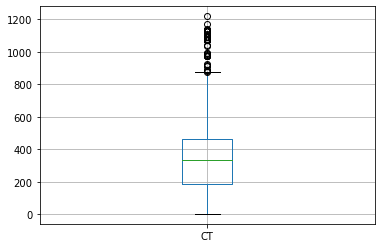

In [70]:
data3.boxplot(column="CT") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

<AxesSubplot:xlabel='CT', ylabel='Density'>

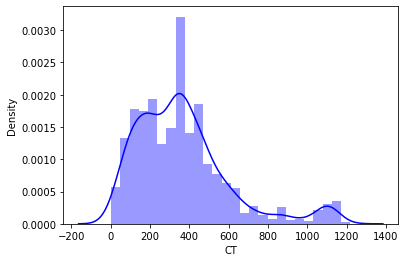

In [71]:
sns.distplot(data3["CT"], color="blue",kde=True) #Lets see the distribusion curve

In [72]:
data3.isnull().sum()

Region            0
Metro             0
SiteType          0
DeploymentType    0
NIDPM             0
DPM               0
IsMainstream      0
FacilityCode      0
ClassType         0
CT                0
dtype: int64

In [73]:
data3.tail()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT
2201,EMEA,Dublin,DC,New Build,Chike Duru,Sreehitha Vadlamudi (Tata Consultancy Services...,True,DUB10,Class A,605.0
2203,APAC,Sydney,DC,Expansion,Vinay Vijayendra Murthy,Saroj Gohil (Tata Consultancy Services Ltd),False,SYD26,Class C,356.0
2204,APAC,Perth,GW,New Build,Vinay Vijayendra Murthy,Jai Prakash Vyas (Tata Consultancy Services),False,PER01,Class F,217.0
2205,APAC,Singapore,RNG,Aug,Vinay Vijayendra Murthy,Madhuri Bhalerao (Tata Consultancy Services Ltd),False,SG3,Class C,438.0
2206,AMEREAST,Miami,GW,New Build,Brian Long,Guillermo Alonso (Tata Consultancy Services Ltd),False,MIA,Class E,157.0


In [74]:
data3.shape

(1593, 10)

In [75]:
data3.tail()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT
2201,EMEA,Dublin,DC,New Build,Chike Duru,Sreehitha Vadlamudi (Tata Consultancy Services...,True,DUB10,Class A,605.0
2203,APAC,Sydney,DC,Expansion,Vinay Vijayendra Murthy,Saroj Gohil (Tata Consultancy Services Ltd),False,SYD26,Class C,356.0
2204,APAC,Perth,GW,New Build,Vinay Vijayendra Murthy,Jai Prakash Vyas (Tata Consultancy Services),False,PER01,Class F,217.0
2205,APAC,Singapore,RNG,Aug,Vinay Vijayendra Murthy,Madhuri Bhalerao (Tata Consultancy Services Ltd),False,SG3,Class C,438.0
2206,AMEREAST,Miami,GW,New Build,Brian Long,Guillermo Alonso (Tata Consultancy Services Ltd),False,MIA,Class E,157.0


In [76]:
data3.reset_index(inplace=True)

In [77]:
data3.tail()

,index,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT
1588,2201,EMEA,Dublin,DC,New Build,Chike Duru,Sreehitha Vadlamudi (Tata Consultancy Services...,True,DUB10,Class A,605.0
1589,2203,APAC,Sydney,DC,Expansion,Vinay Vijayendra Murthy,Saroj Gohil (Tata Consultancy Services Ltd),False,SYD26,Class C,356.0
1590,2204,APAC,Perth,GW,New Build,Vinay Vijayendra Murthy,Jai Prakash Vyas (Tata Consultancy Services),False,PER01,Class F,217.0
1591,2205,APAC,Singapore,RNG,Aug,Vinay Vijayendra Murthy,Madhuri Bhalerao (Tata Consultancy Services Ltd),False,SG3,Class C,438.0
1592,2206,AMEREAST,Miami,GW,New Build,Brian Long,Guillermo Alonso (Tata Consultancy Services Ltd),False,MIA,Class E,157.0


In [78]:
condition_new= [
    (data3['CT']<=310),
    (data3['CT']>310)
    
]

In [79]:
condition_new2= [
    (data3['CT']<=310),
    (data3['CT']>310) & (data3['CT']<=620),
    (data3['CT']>620) & (data3['CT']<=930),
    (data3['CT']>930)
    ]

In [80]:
condition_new3= [
    (data3['CT']<=310),
    (data3['CT']>310) & (data3['CT']<=620),
    (data3['CT']>620)
    ]

In [81]:
data3['CT_Status']=np.select(condition_new,con_value)
data3['CT_Indicator']=np.select(condition_new2,con2_value)
data3['CT_Indicator_3']=np.select(condition_new3,con3_value)

In [82]:
data3.sample(5)

,index,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT,CT_Status,CT_Indicator,CT_Indicator_3
1247,1632,AMEREAST,Beaumont,CLS/ILA,New Build,Jamie Holloway,Shane Ross (Tata Consultancy Services Ltd),False,BPT01,Class G,476.0,Out-of SLA,Yellow,Yellow
1119,1448,AMERWEST,Cheyenne,CLS/ILA,Upgrade,Darren (Norm) Norman,Betina Filippon (Tata Consultancy Services Ltd),False,BUR70,Class G,334.0,Out-of SLA,Yellow,Yellow
1510,1937,AMERWEST,Cheyenne,RNG,Upgrade,Denise Holland,Shweta Gadre (Tata Consultancy Services),False,CYS04,Class A,96.0,With-in SLA,Green,Green
1333,1736,APAC,Hong Kong,DC,Expansion,Vinay Vijayendra Murthy,Jai Prakash Vyas (Tata Consultancy Services),False,HK2,Class C,191.0,With-in SLA,Green,Green
1560,2102,AMERWEST,Vancouver,SuperNode,New Build,Matt Greenway,Griselda Kereki (Tata Consultancy Services Ltd),False,YVR31,Missing,147.0,With-in SLA,Green,Green


In [83]:
data3.drop('index',inplace=True,axis=1)

In [84]:
data3.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT,CT_Status,CT_Indicator,CT_Indicator_3
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,With-in SLA,Green,Green
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,With-in SLA,Green,Green
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,With-in SLA,Green,Green
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C,91.0,With-in SLA,Green,Green
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E,117.0,With-in SLA,Green,Green


<AxesSubplot:>

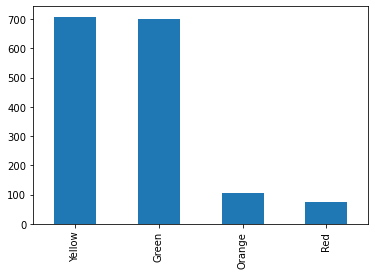

In [85]:
data3['CT_Indicator'].value_counts().plot.bar()

<AxesSubplot:>

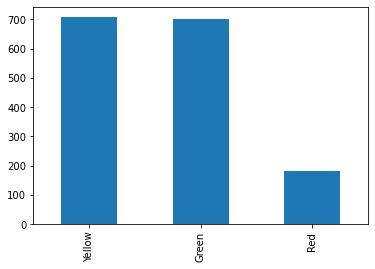

In [86]:
data3['CT_Indicator_3'].value_counts().plot.bar()

<AxesSubplot:>

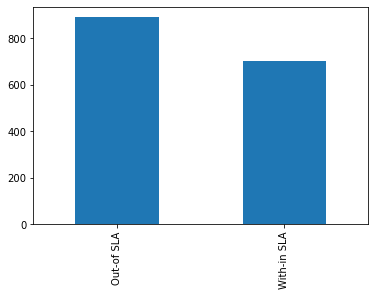

In [87]:
data3['CT_Status'].value_counts().plot.bar()

In [88]:
data3.columns

Index(['Region', 'Metro', 'SiteType', 'DeploymentType', 'NIDPM', 'DPM',
       'IsMainstream', 'FacilityCode', 'ClassType', 'CT', 'CT_Status',
       'CT_Indicator', 'CT_Indicator_3'],
      dtype='object')

In [92]:
data3.to_csv('NID_revised_cleanData.csv',index=0,columns=data3.columns)